# Medical Health Insurance costs : A Machine Learning Model

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

#### 1. Data Preprocessing and Exploration:

In [2]:
health_insurance_data = pd.read_csv("D:/Hochschule Fresenius notes (sem3)/Artifical Intelligence and Machine Learning/Medical_Insurance/insurance.csv", delimiter=",")
health_insurance_data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
# Identify categorical and numerical features for preprocessing
categorical_features = ['sex', 'smoker', 'region']  # Categorical columns
numerical_features = ['age', 'bmi', 'children']  # Numerical columns

In [4]:
# Define the preprocessor for data transformations
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),  # Standardize numerical features
        ('cat', OneHotEncoder(), categorical_features)  # Encode categorical features
    ]
)

In [5]:
# Splitting the data into features (X) and target (y)
X = health_insurance_data.drop(columns=['charges'])  # Features are all columns except 'charges'
y = health_insurance_data['charges']  # Target variable is 'charges'

In [6]:
# Splitting the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
# Creating a pipeline that first preprocesses the data and then fits a regression model
mi_model = Pipeline(steps=[
    ('preprocessor', preprocessor),  # Step to preprocess the data
    ('regressor', LinearRegression())  # Step to apply linear regression
])

In [8]:
# Training the model with the training data
mi_model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['age', 'bmi', 'children']),
                                                 ('cat', OneHotEncoder(),
                                                  ['sex', 'smoker',
                                                   'region'])])),
                ('regressor', LinearRegression())])

In [9]:
# Making predictions using the test set
y_pred = mi_model.predict(X_test)

In [10]:
# Evaluating the model using Mean Squared Error (MSE) and R-squared (R²) score
mse = mean_squared_error(y_test, y_pred)  # Calculate MSE
r2 = r2_score(y_test, y_pred)  # Calculate R² score

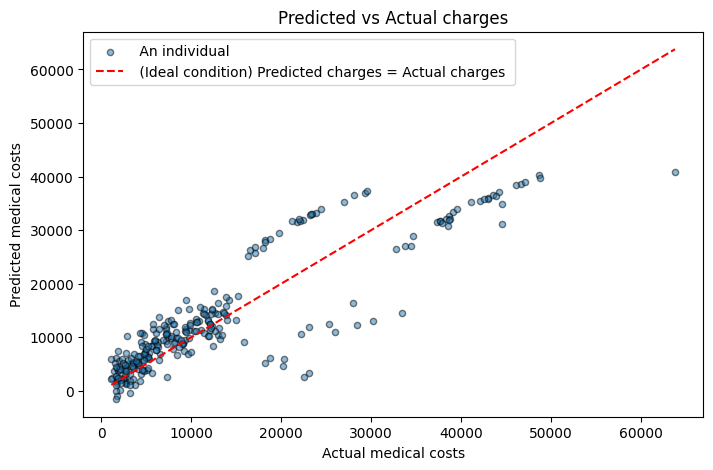

In [11]:
plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_pred, alpha=0.5, s=20, edgecolor='k',label=" An individual ")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--',label=" (Ideal condition) Predicted charges = Actual charges ")
plt.title('Predicted vs Actual charges') 
plt.xlabel('Actual medical costs')
plt.ylabel('Predicted medical costs')
plt.legend()
plt.show()

In [12]:
# Display evaluation metrics
print(f'Mean Squared Error (MSE): {mse}')
print(f'R-squared (R²) Score: {r2}')

Mean Squared Error (MSE): 33596915.851361476
R-squared (R²) Score: 0.7835929767120722


smoking status exhibits a strong correlation with higher insurance costs

Age and BMI are also positively correlated with increased charges

In [13]:
health_insurance_data.head(1)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.9,0,yes,southwest,16884.924


In [14]:
data = pd.DataFrame({"age":19,"sex":"female","bmi":27.9,"children":0,"smoker":"yes","region":"southwest","charges":16884.924}, index=[0])
new_prediction = mi_model.predict(data)
print(" the prediction value : $",new_prediction)

 the prediction value : $ [25197.53106142]


In [15]:
import joblib
joblib.dump(mi_model,"health_insurance_model")

['health_insurance_model']

In [16]:
model =joblib.load('health_insurance_model')

In [17]:
model.predict(data)

array([25197.53106142])